In [1]:
from maze import MazeEnv, ACTIONS
import numpy as np
import matplotlib.pylab as plt
from PIL import Image
from IPython import display
import numpy as np
from tqdm import tqdm

In [2]:
width, height = 8, 8
obstacle_positions = [(2, 2), (5, 3), (1, 3), (3,5)]

In [3]:
filename = 'imagedraw.gif'
images = []
env = MazeEnv(width, height, (0,0), obstacle_positions)
state = env.reset()
done = False
reward_sum = 0.0

img = env.render()
im = Image.fromarray(img)
im = im.resize((400, 400), resample=0)
images.append(im)

while not done:
    action = np.random.choice(len(ACTIONS))
    state, reward, done, _ = env.step(action)
    # print(state, reward, done)
    reward_sum += reward
    img = env.render()
    im = Image.fromarray(img)
    im = im.resize((400, 400), resample=0)
    images.append(im)
    
images[0].save(filename,
               save_all=True, append_images=images[1:],
               optimize=False, duration=40, loop=0)
print(reward_sum)

-493.0


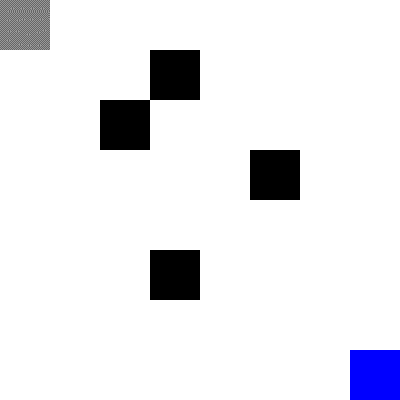

In [4]:
display.Image(filename)

In [5]:
all_positions = [(x, y) for x in range(width) for y in range(height)]
print(all_positions)
possible_starts = sorted(list(set(all_positions).difference(set(obstacle_positions + [(width-1, height-1)]))))
print(possible_starts)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 4), (1, 5), (1, 6), (1, 7), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 6), (3, 7), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1), (5, 2), (5, 4), (5, 5), (5, 6), (5, 7), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6)]


In [7]:
from collections import defaultdict

returns_sum = defaultdict(lambda: np.zeros(env.action_space.n))
N = defaultdict(lambda: np.zeros(env.action_space.n))
Q = defaultdict(lambda: np.zeros(env.action_space.n))

num_episodes = 100
for start in possible_starts:
    env = MazeEnv(width, height, start, obstacle_positions)
    state = env.reset()
    for e_id in tqdm(range(num_episodes), desc="Start: {}".format(start)):
        episode = []
        state = env.reset()
        done = False
        while not done:
            action = np.random.choice(len(ACTIONS))
            new_state, reward, done, _ = env.step(action)
            episode.append((tuple(state), action, reward))
            state = new_state
        
        states, actions, rewards = zip(*episode)
        for i, state in enumerate(states):
            returns_sum[state][actions[i]] += sum(rewards[i:])
            N[state][actions[i]] += 1.0
            Q[state][actions[i]] = returns_sum[state][actions[i]] / N[state][actions[i]]

Start: (7, 6): 100%|██████████| 100/100 [00:01<00:00, 94.78it/s]


In [8]:
import pandas as pd
pd.DataFrame(Q).T

0           1           2           3
0 0 -661.605385 -674.012188 -666.884946 -675.688048
  1 -648.774208 -665.654175 -646.833003 -657.431388
  2 -618.682388 -649.771539 -662.211301 -647.721456
1 0 -656.999888 -659.335249 -640.269756 -673.663718
  1 -667.639948 -664.085140 -627.331435 -658.126525
2 0 -634.910399 -635.262544 -618.190575 -647.881631
3 0 -621.371602 -632.173388 -602.716631 -634.081111
2 1 -634.996637 -634.290817 -602.099209 -652.567738
3 1 -584.249403 -623.504074 -587.395923 -634.011347
4 1 -563.037468 -609.742817 -571.778853 -603.254932
5 1 -549.612125 -569.954605 -550.978229 -589.539756
  0 -558.401269 -589.303831 -578.132252 -599.480940
  2 -563.123581 -565.767016 -527.459551 -566.186737
4 2 -529.557436 -581.946850 -558.232299 -576.824301
  3 -474.291377 -560.858399 -540.049597 -542.412285
6 2 -474.654353 -572.727978 -522.709192 -561.183716
7 2 -461.402188 -555.994661 -541.099799 -540.122877
  3 -389.653785 -515.802233 -453.600530 -466.906667
  4 -309.019361 -455.199170 -406.298480 -421.047063
  5 -193.170325 -398.350164 -312.025339 -345.216371
  6   20.000000 -311.591388 -189.067923 -284.605718
4 0 -593.773380 -616.649666 -585.170299 -625.625702
6 1 -539.979121 -580.147627 -560.072082 -569.682795
  0 -562.954089 -580.977561 -584.477422 -590.104694
3 2 -559.441113 -606.384505 -560.916952 -583.606615
7 1 -527.137558 -577.269169 -571.950898 -568.284578
  0 -562.772244 -576.988086 -584.564461 -587.676572
6 3 -409.965257 -527.925216 -461.007712 -473.392747
3 3 -530.807167 -573.688400 -526.959761 -569.082903
2 3 -568.890486 -586.145731 -550.836978 -567.469769
  4 -556.031636 -563.100909 -534.544377 -575.790724
  5 -526.040320 -563.660537 -569.503893 -576.054585
  6 -516.616898 -552.523280 -466.085244 -541.970460
1 6 -531.053315 -567.565625 -515.994672 -556.555181
3 6 -455.238535 -463.657274 -425.348686 -524.751169
4 6 -399.049818 -434.310570 -347.878864 -474.332550
1 7 -542.877289 -542.851842 -495.042892 -546.755967
0 6 -556.697098 -572.842015 -544.359768 -563.834822
  5 -568.322490 -587.378969 -559.005968 -570.032423
1 5 -545.393564 -570.089856 -565.514437 -579.921125
0 7 -561.201511 -556.171085 -535.733401 -556.110327
2 7 -507.135776 -514.668125 -467.270698 -524.626286
3 7 -457.012041 -472.815734 -414.453469 -504.150584
4 7 -414.867166 -411.816586 -318.398112 -479.073870
5 7 -312.426851 -342.272590 -197.284464 -403.812350
1 4 -562.151401 -567.884912 -554.404255 -581.281242
0 4 -570.477708 -606.264942 -560.113436 -584.889642
  3 -576.256652 -637.500854 -622.068402 -616.675868
3 4 -528.346459 -553.118826 -491.181183 -545.271741
4 4 -431.769352 -529.800029 -419.402536 -532.642156
5 4 -398.330002 -425.168143 -403.072274 -466.265436
6 4 -337.137213 -465.946414 -405.531551 -426.113173
  5 -257.265215 -403.721014 -322.209616 -370.436703
5 5 -344.457783 -430.036928 -340.729257 -430.830247
6 6 -189.542822 -334.470120 -199.290275 -348.150986
5 6 -313.149960 -387.364140 -270.379513 -405.394028
4 5 -411.325556 -486.748569 -390.577134 -436.488777
1 2 -663.400468 -665.686776 -670.388219 -651.966340
6 7 -207.772213 -271.063664   20.000000 -323.781812

In [9]:
from utils import eval_policy, mc_policy

env = MazeEnv(width, height, (0, 0), obstacle_positions)
avg, _ = eval_policy(env, lambda s: mc_policy(env, s, Q, eps=1.0), 100)

100%|██████████| 100/100 [00:05<00:00, 17.79it/s]The average cumulative reward -664.63 while 100 episodes



In [10]:
env = MazeEnv(width, height, (0, 0), obstacle_positions)
avg, _ = eval_policy(env, lambda s: mc_policy(env, s, Q, eps=0.01), 100)

100%|██████████| 100/100 [00:00<00:00, 407.38it/s]The average cumulative reward 6.82 while 100 episodes



In [11]:
env = MazeEnv(width, height, (0, 0), obstacle_positions)
avg, _ = eval_policy(env, lambda s: mc_policy(env, s, Q, eps=0.00), 100)

100%|██████████| 100/100 [00:00<00:00, 404.88it/s]The average cumulative reward 7.0 while 100 episodes

